# AFL2 DATA MINING
-------------------------------------------
TRISHA ALEXIS LIKORAWUNG 

07060221110037


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
import datetime
from sklearn.decomposition import PCA

In [2]:
url = 'https://raw.githubusercontent.com/Trsh16/customer-analisis/main/customer_analysis.csv'
df = pd.read_csv(url, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<h4><b>Data Cleaning and preparation:</b></h4>

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df['Income'].fillna(0, inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [5]:
date_format = '%d-%m-%Y'
date = pd.to_datetime((df['Dt_Customer']), format=date_format)
date

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

<h4><b>Feature Engineering (Create/Remove feature from available data):</b></h4>

In [7]:
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,56
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,77
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,42
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,67


In [8]:
category_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Spent'] = df[category_columns].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,66,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,69,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,58,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,39,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,42,422


In [9]:
def living_arrangement(marital_status):
    if marital_status in ['Together', 'Married']:
        return 'With Partner'
    elif marital_status in ['Single', 'Divorced', 'Widow']:
        return 'Alone'
    else:
        return 'Other'

df['Living_With'] = df['Marital_Status'].apply(living_arrangement)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,66,1617,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,69,27,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,58,776,With Partner
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,39,53,With Partner
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,42,422,With Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,56,1341,With Partner
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,77,444,With Partner
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,42,1241,Alone
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,67,843,With Partner


In [10]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,66,1617,Alone,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,69,27,Alone,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,58,776,With Partner,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,39,53,With Partner,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,42,422,With Partner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,3,11,0,56,1341,With Partner,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,1,0,0,3,11,0,77,444,With Partner,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,42,1241,Alone,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,3,11,0,67,843,With Partner,1


In [11]:
def calculate_family_size(row):
    if row['Marital_Status'] in ['Single', 'Divorced', 'Widow']:
        return 1 + row['Children']
    else:
        return 2 + row['Children']
    
df['Family_Size'] = df.apply(calculate_family_size, axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,66,1617,Alone,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,69,27,Alone,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,58,776,With Partner,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,39,53,With Partner,1,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,42,422,With Partner,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,3,11,0,56,1341,With Partner,1,3
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,3,11,0,77,444,With Partner,3,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,3,11,0,42,1241,Alone,0,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,3,11,0,67,843,With Partner,1,3


In [12]:
def parental_status(row):
    if row['Kidhome'] > 0 or row['Teenhome'] > 0:
        return 1  # Is a parent
    else:
        return 0  # Not a parent
df['Is_Parent'] = df.apply(parental_status, axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,66,1617,Alone,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,69,27,Alone,2,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,58,776,With Partner,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,39,53,With Partner,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,42,422,With Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,3,11,0,56,1341,With Partner,1,3,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,3,11,0,77,444,With Partner,3,5,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,3,11,0,42,1241,Alone,0,1,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,3,11,0,67,843,With Partner,1,3,1


In [13]:
education_mapping = {
    'Graduation': 'Bachelor',
    'PhD': "PhD or Master",
    'Basic': "High School or Below",
    'Master': "PhD Master",
    '2n Cycle': "PhD or Master" 
}
df['Education'] = df['Education'].replace(education_mapping)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,66,1617,Alone,0,1,0
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,69,27,Alone,2,3,1
2,4141,1965,Bachelor,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,58,776,With Partner,0,2,0
3,6182,1984,Bachelor,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,39,53,With Partner,1,3,1
4,5324,1981,PhD or Master,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,42,422,With Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,13-06-2013,46,709,...,0,3,11,0,56,1341,With Partner,1,3,1
2236,4001,1946,PhD or Master,Together,64014.0,2,1,10-06-2014,56,406,...,0,3,11,0,77,444,With Partner,3,5,1
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,3,11,0,42,1241,Alone,0,1,0
2238,8235,1956,PhD Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,3,11,0,67,843,With Partner,1,3,1


In [14]:
redundant_columns = ['ID', 'Dt_Customer']
df.drop(columns=redundant_columns, inplace=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1957,Bachelor,Single,58138.0,0,0,58,635,88,546,...,0,3,11,1,66,1617,Alone,0,1,0
1,1954,Bachelor,Single,46344.0,1,1,38,11,1,6,...,0,3,11,0,69,27,Alone,2,3,1
2,1965,Bachelor,Together,71613.0,0,0,26,426,49,127,...,0,3,11,0,58,776,With Partner,0,2,0
3,1984,Bachelor,Together,26646.0,1,0,26,11,4,20,...,0,3,11,0,39,53,With Partner,1,3,1
4,1981,PhD or Master,Married,58293.0,1,0,94,173,43,118,...,0,3,11,0,42,422,With Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Bachelor,Married,61223.0,0,1,46,709,43,182,...,0,3,11,0,56,1341,With Partner,1,3,1
2236,1946,PhD or Master,Together,64014.0,2,1,56,406,0,30,...,0,3,11,0,77,444,With Partner,3,5,1
2237,1981,Bachelor,Divorced,56981.0,0,0,91,908,48,217,...,0,3,11,0,42,1241,Alone,0,1,0
2238,1956,PhD Master,Together,69245.0,0,1,8,428,30,214,...,0,3,11,0,67,843,With Partner,1,3,1


<h4><b>Data Preparation</b></h4>

In [15]:
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Living_With'] = label_encoder.fit_transform(df['Living_With'])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1957,0,4,58138.0,0,0,58,635,88,546,...,0,3,11,1,66,1617,0,0,1,0
1,1954,0,4,46344.0,1,1,38,11,1,6,...,0,3,11,0,69,27,0,2,3,1
2,1965,0,5,71613.0,0,0,26,426,49,127,...,0,3,11,0,58,776,2,0,2,0
3,1984,0,5,26646.0,1,0,26,11,4,20,...,0,3,11,0,39,53,2,1,3,1
4,1981,3,3,58293.0,1,0,94,173,43,118,...,0,3,11,0,42,422,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,0,3,61223.0,0,1,46,709,43,182,...,0,3,11,0,56,1341,2,1,3,1
2236,1946,3,5,64014.0,2,1,56,406,0,30,...,0,3,11,0,77,444,2,3,5,1
2237,1981,0,2,56981.0,0,0,91,908,48,217,...,0,3,11,0,42,1241,0,0,1,0
2238,1956,2,5,69245.0,0,1,8,428,30,214,...,0,3,11,0,67,843,2,1,3,1


In [16]:
numerical_features = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 
                      'Z_Revenue', 'Response', 'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent']
numerical_df = df[numerical_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)
df[numerical_features] = scaled_df
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.985345,-0.946279,0.251004,0.251939,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,...,-0.097282,0.0,0.0,2.388846,0.985345,1.679417,-1.353795,-1.264505,-1.763209,-1.584605
1,-1.235733,-0.946279,0.251004,-0.208699,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,...,-0.097282,0.0,0.0,-0.418612,1.235733,-0.961275,-1.353795,1.396361,0.443265,0.631072
2,-0.317643,-0.946279,1.180340,0.778231,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,...,-0.097282,0.0,0.0,-0.418612,0.317643,0.282673,0.741197,-1.264505,-0.659972,-1.584605
3,1.268149,-0.946279,1.180340,-0.978043,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,...,-0.097282,0.0,0.0,-0.418612,-1.268149,-0.918094,0.741197,0.065928,0.443265,0.631072
4,1.017761,1.276368,-0.678332,0.257992,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,...,-0.097282,0.0,0.0,-0.418612,-1.017761,-0.305254,0.741197,0.065928,0.443265,0.631072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,-0.946279,-0.678332,0.372429,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,...,-0.097282,0.0,0.0,-0.418612,0.150717,1.221032,0.741197,0.065928,0.443265,0.631072
2236,-1.903435,1.276368,1.180340,0.481437,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,...,-0.097282,0.0,0.0,-0.418612,1.903435,-0.268717,0.741197,2.726794,2.649738,0.631072
2237,1.017761,-0.946279,-1.607669,0.206750,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,...,-0.097282,0.0,0.0,-0.418612,-1.017761,1.054951,-1.353795,-1.264505,-1.763209,-1.584605
2238,-1.068807,0.535486,1.180340,0.685744,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,...,-0.097282,0.0,0.0,-0.418612,1.068807,0.393948,0.741197,0.065928,0.443265,0.631072


In [61]:
# reduce dimension with PCA using 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
componenrs = pca.fit_transform(scaled_df)

Text(0, 0.5, 'Principle Component')

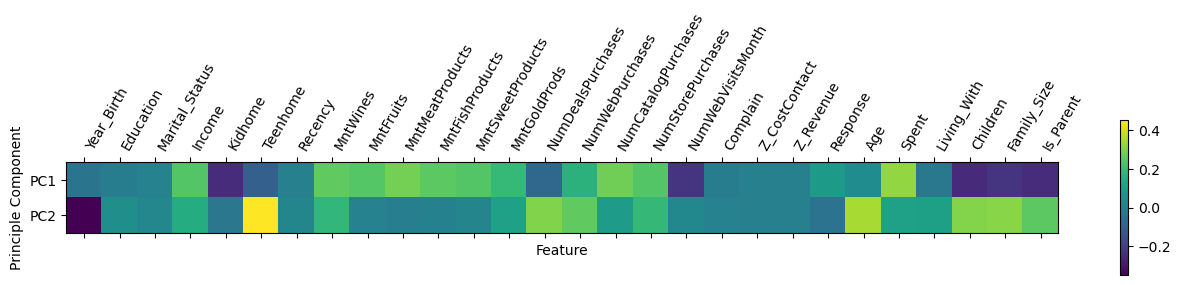

In [62]:
# using mathplotlib create a heatmap based on the variance and new features

from matplotlib import pyplot as plt

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['PC1','PC2'])
plt.colorbar()
plt.xticks(range(len(numerical_df.columns)), numerical_df.columns, ha='left', rotation=60)
plt.xlabel('Feature')
plt.ylabel('Principle Component')

In [63]:
# print explained variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.31295311 0.11880943]


In [64]:
#create dataframe for the new feature
pca_df = pd.DataFrame(data=componenrs, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,5.200934,-0.170342
1,-2.814846,0.786075
2,2.555183,-0.529361
3,-2.613447,-1.885092
4,-0.730405,-0.270501


In [72]:
# set the parameter for evaluating K
kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,"random_state": 42,}

# check the inertia for each K
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scaled_df)
    SSE.append(kmeans.inertia_)

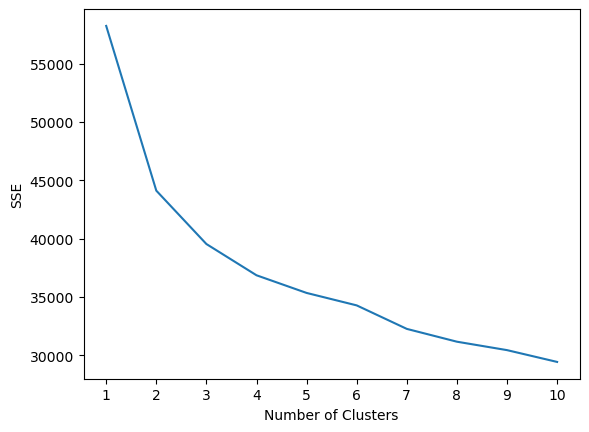

In [73]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [74]:
# using kneelocator to find the elbow/knee

from kneed import KneeLocator
findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('the best k for your model is ', findknee.elbow)

the best k for your model is  3


In [75]:
# assign the cluster for each sample in the dataset

from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
agglo.fit_predict(scaled_df)

/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 1, ..., 1, 2, 0])

Text(0, 0.5, 'Spending')

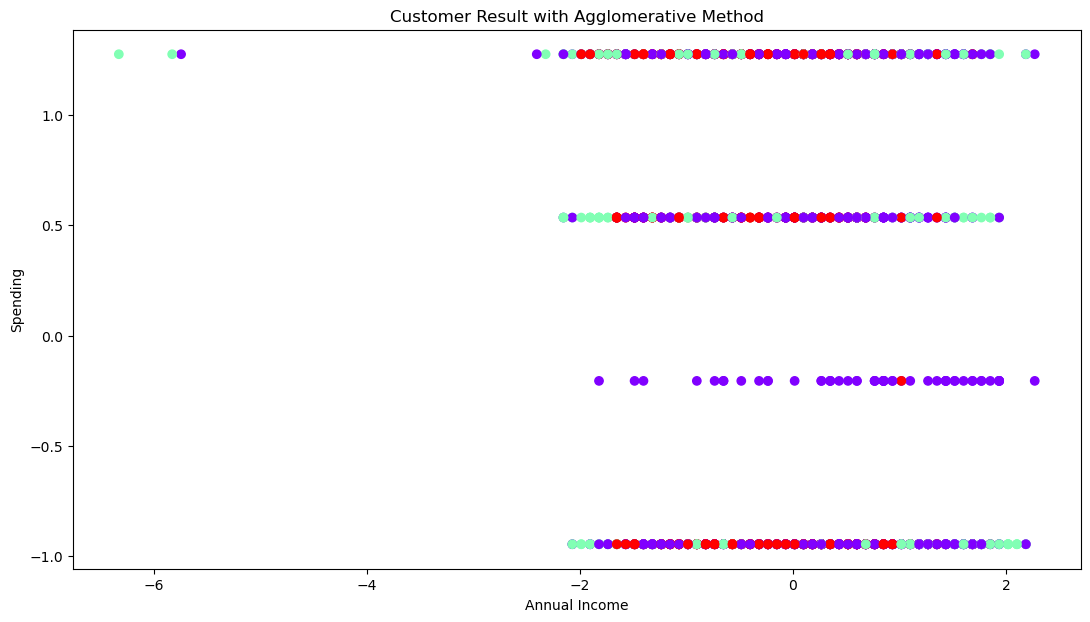

In [76]:
# Visualize clustering result with scatter plot

plt.figure(figsize=(13,7))
plt.title("Customer Result with Agglomerative Method")
plt.scatter(scaled_df.iloc[:,0], scaled_df.iloc[:,1], c=agglo.labels_, cmap = 'rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending')

In [77]:
# create data frame with label
agglo_lb = pd.DataFrame(agglo.fit_predict(scaled_df), columns=['label'])
agglo_df = pd.concat([scaled_df, agglo_lb], axis=1)
agglo_df.head()

/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,label
0,-0.985345,-0.946279,0.251004,0.251939,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,...,0.0,0.0,2.388846,0.985345,1.679417,-1.353795,-1.264505,-1.763209,-1.584605,1
1,-1.235733,-0.946279,0.251004,-0.208699,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,...,0.0,0.0,-0.418612,1.235733,-0.961275,-1.353795,1.396361,0.443265,0.631072,0
2,-0.317643,-0.946279,1.180340,0.778231,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,...,0.0,0.0,-0.418612,0.317643,0.282673,0.741197,-1.264505,-0.659972,-1.584605,1
3,1.268149,-0.946279,1.180340,-0.978043,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,...,0.0,0.0,-0.418612,-1.268149,-0.918094,0.741197,0.065928,0.443265,0.631072,0
4,1.017761,1.276368,-0.678332,0.257992,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,...,0.0,0.0,-0.418612,-1.017761,-0.305254,0.741197,0.065928,0.443265,0.631072,2


Text(0, 0.5, 'Spending')

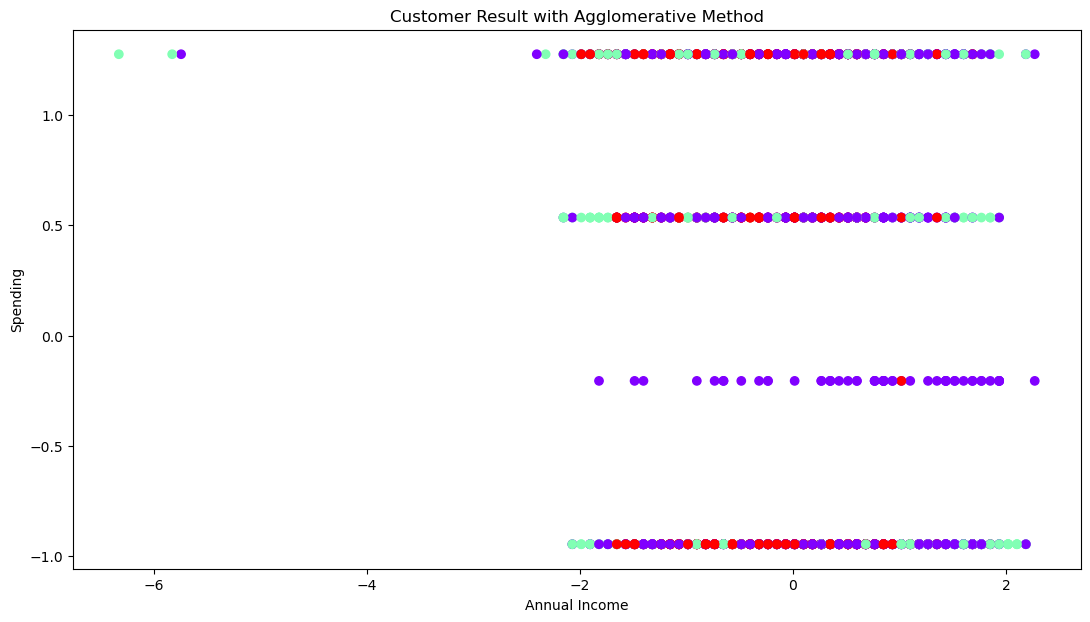

In [78]:
# Visualize clustering result with scatter plot

plt.figure(figsize=(13,7))
plt.title("Customer Result with Agglomerative Method")
plt.scatter(agglo_df.iloc[:,0], agglo_df.iloc[:,1], c=agglo.labels_, cmap = 'rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending')

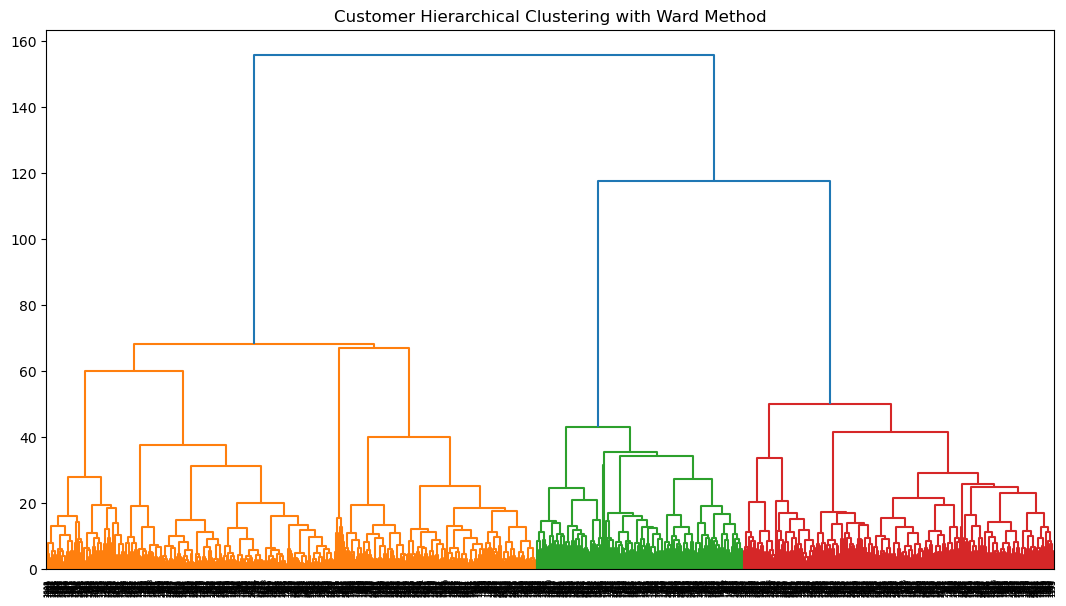

In [79]:
# create a dendrogram with Ward Method -> ward linkage
import scipy.cluster.hierarchy as hie

plt.figure(figsize=(13,7))
plt.title("Customer Hierarchical Clustering with Ward Method")
dendro = hie.dendrogram(hie.linkage(agglo_df, method = 'ward'))

/var/folders/km/hq_dmh410fx9mr054g3kg7840000gn/T/ipykernel_40815/1339316956.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Income', y='Spent', data=agglo_df, palette='tab10')


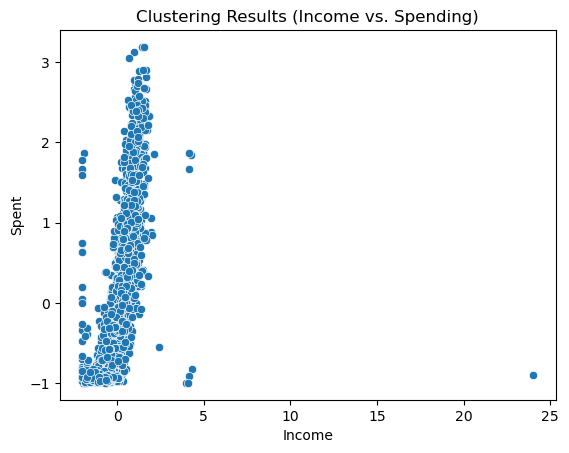

ValueError: Could not interpret value `Cluster_Labels` for parameter `x`

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot to visualize clustering
sns.scatterplot(x='Income', y='Spent', data=agglo_df, palette='tab10')
plt.title('Clustering Results (Income vs. Spending)')
plt.show()

/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/marsh

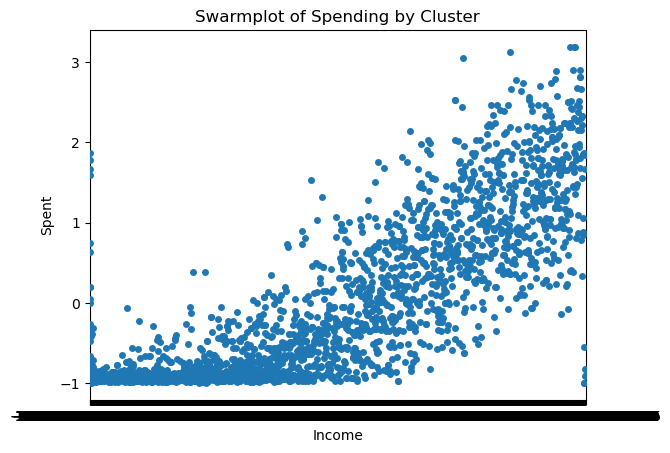

In [85]:

# Swarmplot to visualize individual data points in clusters
sns.swarmplot(x='Income', y='Spent', data=agglo_df)
plt.title('Swarmplot of Spending by Cluster')
plt.show()

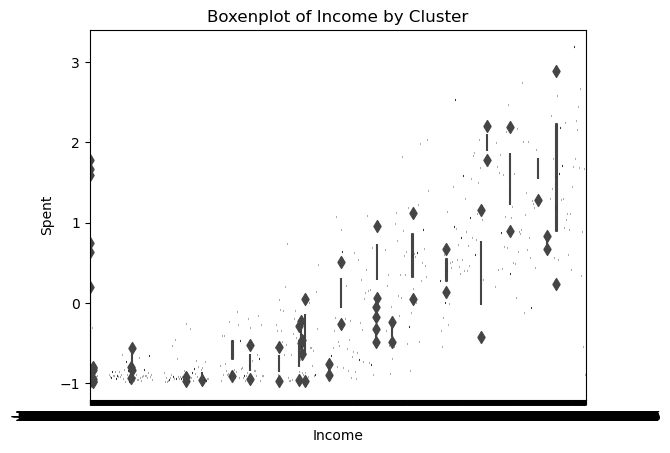

In [86]:
# Boxenplot to understand cluster characteristics
sns.boxenplot(x='Income', y='Spent', data=agglo_df)
plt.title('Boxenplot of Income by Cluster')
plt.show()

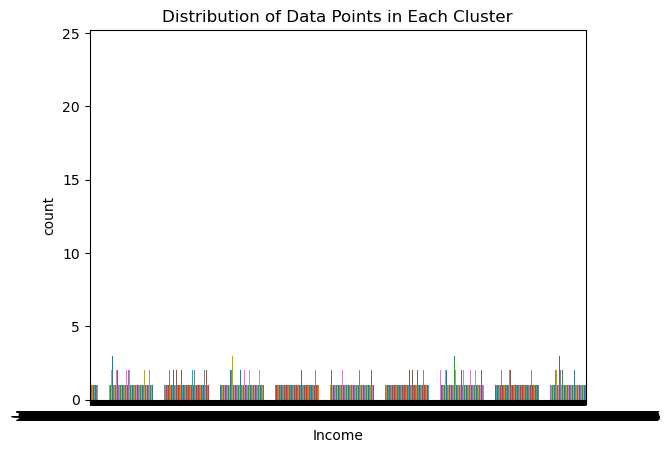

In [88]:
sns.countplot(x='Income', data=agglo_df, palette='tab10')
plt.title('Distribution of Data Points in Each Cluster')
plt.show()

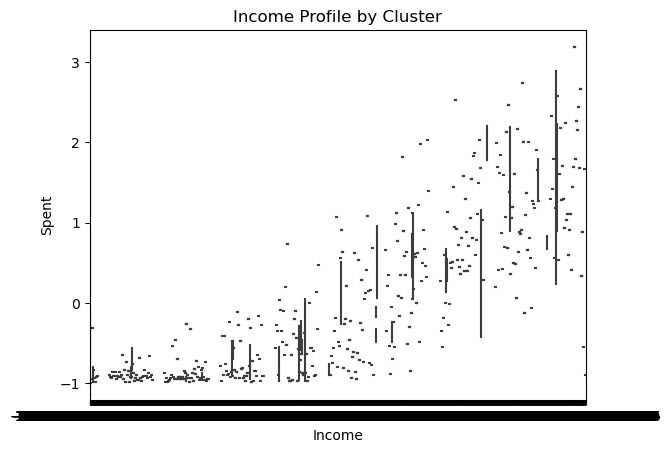

In [89]:
# Box plot to profile income and spending by cluster
sns.boxplot(x='Income', y='Spent', data=agglo_df, palette='tab10')
plt.title('Income Profile by Cluster')
plt.show()
